# ROXY Package Comparison

Compare my ROXY implementation with the ROXY package itself.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from roxy.regressor import RoxyRegressor
import roxy.plotting

import sys
import os
sys.path.append(os.path.abspath("../UTILITIES/"))
from general import *
from single_reg_no_uplims import *

# Website Example

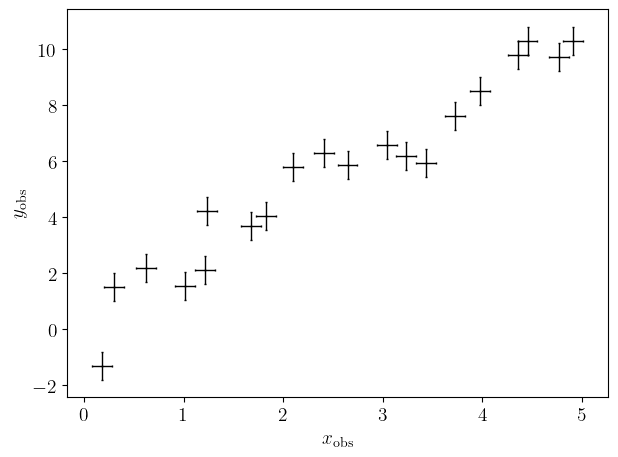

In [2]:
def my_fun(x, theta):
    return theta[0] * x + theta[1]


param_names = ['A', 'B']
theta0 = [2, 0.5]
param_prior = {'A':[0, 5], 'B':[-2, 2], 'sig':[0, 3.0]}

reg = RoxyRegressor(my_fun, param_names, theta0, param_prior)

nx = 20
xerr = 0.1
yerr = 0.5
sig = 0.5

np.random.seed(0)

xtrue = np.linspace(0, 5, nx)
ytrue = reg.value(xtrue, theta0)
xobs = xtrue + np.random.normal(size=len(xtrue)) * xerr
yobs = ytrue + np.random.normal(size=len(xtrue)) * np.sqrt(yerr ** 2 + sig ** 2)

plot_kwargs = {'fmt':'.', 'markersize':1, 'zorder':1,
                 'capsize':1, 'elinewidth':1.0, 'color':'k', 'alpha':1}
plt.errorbar(xobs, yobs, xerr=xerr, yerr=yerr, **plot_kwargs)
plt.xlabel(r'$x_{\rm obs}$', fontsize=14)
plt.ylabel(r'$y_{\rm obs}$', fontsize=14)
plt.tight_layout()

### With ROXY Package

In [3]:
res, all_param_names = reg.optimise(param_names, xobs, yobs, [xerr, yerr], method='mnr')


Optimisation Results:
A:	2.095400810241699
B:	0.1816725730895996
sig:	0.6321958899497986
mu_gauss:	2.5576601028442383
w_gauss:	1.4816385507583618


In [4]:
nwarm, nsamp = 700, 5000
samples = reg.mcmc(param_names, xobs, yobs, [xerr, yerr], nwarm, nsamp, method='mnr')


Optimisation Results:
A:	2.095559597015381
B:	0.18108125030994415
sig:	0.6320778131484985
mu_gauss:	2.5569770336151123
w_gauss:	1.4816246032714844

Running MCMC


sample: 100%|██████████| 5700/5700 [00:05<00:00, 997.24it/s, 7 steps of size 3.13e-01. acc. prob=0.94]  



                mean       std    median      2.5%     97.5%     n_eff     r_hat
         A      2.10      0.14      2.10      1.82      2.37   2527.72      1.00
         B      0.17      0.41      0.17     -0.62      0.99   2539.90      1.00
  mu_gauss      2.56      0.37      2.55      1.86      3.28   3147.89      1.00
       sig      0.74      0.21      0.72      0.35      1.17   3398.89      1.00
   w_gauss      1.64      0.30      1.59      1.11      2.21   3280.63      1.00

Number of divergences: 0


In [5]:
## With more than one Gaussian
nwarm, nsamp = 700, 5000
samples = reg.mcmc(param_names, xobs, yobs, [xerr, yerr], nwarm, nsamp, method='gmm', ngauss=2, gmm_prior='hierarchical')


Optimisation Results:
A:	2.3199551105499268
B:	-0.6900393962860107
sig:	1.609943151473999
mu_gauss_0:	2.0159502029418945
mu_gauss_1:	1.63890540599823
w_gauss_0:	1.5866564512252808
w_gauss_1:	1.0304759740829468
weight_gauss_0:	0.9198907017707825
hyper_mu:	2.7036566734313965
hyper_u2:	2.3104965686798096
hyper_w2:	0.4226193130016327

Running MCMC


sample: 100%|██████████| 5700/5700 [00:11<00:00, 495.70it/s, 23 steps of size 1.92e-01. acc. prob=0.76]



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
          A      2.10      0.14      2.10      1.82      2.39   1489.08      1.00
          B      0.18      0.42      0.18     -0.65      1.02   1602.85      1.00
   hyper_mu      3.95     12.16      2.67     -6.97     11.39    119.14      1.01
   hyper_u2    243.00   3396.00      4.07      0.12    168.42    425.26      1.00
   hyper_w2      5.08      5.82      3.22      0.11     16.14    857.51      1.00
mu_gauss[0]      1.93      0.80      2.09      0.30      3.24    588.75      1.00
mu_gauss[1]      6.07     19.78      3.29      1.29     11.50    165.48      1.00
        sig      0.74      0.21      0.72      0.32      1.17   2833.00      1.00
 w_gauss[0]      1.72      1.14      1.52      0.32      3.37    555.42      1.00
 w_gauss[1]      3.69     23.50      1.58      0.24      9.28   1812.99      1.00
 weights[0]      0.56      0.32      0.59      0.04      1.00    655.26      1.00
 weights[1]    

In [6]:
## Find the best number of Gaussians
max_ngauss = 3
np.random.seed(42)
reg.find_best_gmm(param_names, xobs, yobs, xerr, yerr, max_ngauss, best_metric='BIC', nwarm=100, nsamp=100, gmm_prior='hierarchical')


******************** 
Starting ngauss=1 
********************


Optimisation Results:
A:	2.099846363067627
B:	0.18970751762390137
sig:	0.622419536113739
mu_gauss_0:	2.6290576457977295
w_gauss_0:	1.531994342803955
hyper_mu:	2.55602765083313
hyper_u2:	0.8217321634292603
hyper_w2:	0.21361595392227173

Running MCMC


sample: 100%|██████████| 200/200 [00:01<00:00, 100.17it/s, 31 steps of size 3.19e-01. acc. prob=0.76]



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
          A      2.08      0.15      2.09      1.81      2.44     15.74      1.03
          B      0.24      0.40      0.26     -0.52      1.15     17.15      1.04
   hyper_mu      1.91      8.00      1.60    -16.29     14.36     59.07      0.99
   hyper_u2    175.68    625.47     26.82      1.52    715.52     56.57      1.01
   hyper_w2     10.44      9.20      6.95      1.22     29.94     72.61      1.00
mu_gauss[0]      2.44      0.33      2.48      1.81      3.01     44.74      1.00
        sig      0.74      0.18      0.75      0.43      1.09     71.65      1.04
 w_gauss[0]      1.76      0.38      1.78      1.12      2.31     48.52      1.00
 weights[0]      1.00      0.00      1.00      1.00      1.00       nan       nan

Number of divergences: 5


/mnt/users/crookmansourj/MULTIPLE_LIN_REG_TESTS/roxy/roxy/regressor.py:713: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  neff[i] = numpyro.diagnostics.effective_sample_size(x)
/mnt/users/crookmansourj/MULTIPLE_LIN_REG_TESTS/roxy/roxy/regressor.py:713: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  neff[i] = numpyro.diagnostics.effective_sample_size(x)
/mnt/users/crookmansourj/MULTIPLE_LIN_REG_TESTS/roxy/roxy/regressor.py:713: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.


Optimisation Results:
A:	2.093315362930298
B:	0.11484084278345108
sig:	0.7345805764198303
mu_gauss_0:	2.3823044300079346
w_gauss_0:	1.504351258277893
hyper_mu:	2.6287288665771484
hyper_u2:	0.5957711935043335
hyper_w2:	0.2829938530921936

******************** 
Starting ngauss=2 
********************


Optimisation Results:
A:	2.0970258712768555
B:	0.17760565876960754
sig:	0.638569176197052
mu_gauss_0:	1.4539624452590942
mu_gauss_1:	3.714756965637207
w_gauss_0:	0.8051110506057739
w_gauss_1:	0.7806689739227295
weight_gauss_0:	0.5105355978012085
hyper_mu:	2.584007740020752
hyper_u2:	0.6350058317184448
hyper_w2:	0.12693238258361816

Running MCMC


sample: 100%|██████████| 200/200 [00:02<00:00, 77.48it/s, 23 steps of size 1.14e-01. acc. prob=0.77] 
/mnt/users/crookmansourj/MULTIPLE_LIN_REG_TESTS/roxy/roxy/regressor.py:869: Warning: Fewer than 100 effective samples for parameters: A, B, hyper_mu, hyper_u2, hyper_w2, mu_gauss, sig, w_gauss, weights
  samples = self.mcmc(params_to_opt,



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
          A      2.10      0.11      2.11      1.90      2.30     24.19      1.07
          B      0.18      0.38      0.18     -0.35      1.13     22.85      1.06
   hyper_mu      2.84      8.13      1.96    -12.13     17.22     18.41      0.99
   hyper_u2    107.35    411.42     12.26      0.52    709.89     32.51      1.04
   hyper_w2      7.59      6.03      5.64      1.17     17.53     71.12      1.01
mu_gauss[0]      1.19      1.52      1.79     -2.04      2.89      6.32      1.12
mu_gauss[1]      5.86     11.56      2.93      1.71     20.01     26.35      1.02
        sig      0.74      0.22      0.73      0.37      1.29     58.96      0.99
 w_gauss[0]      2.71      1.48      2.00      1.08      5.71      6.28      1.09
 w_gauss[1]      4.32      8.94      1.88      0.72     20.12     39.93      0.99
 weights[0]      0.47      0.39      0.33      0.02      0.99      9.64      1.02
 weights[1]    

sample: 100%|██████████| 200/200 [00:03<00:00, 60.79it/s, 63 steps of size 6.98e-02. acc. prob=0.95] 
/mnt/users/crookmansourj/MULTIPLE_LIN_REG_TESTS/roxy/roxy/regressor.py:869: Warning: Fewer than 100 effective samples for parameters: A, B, hyper_mu, hyper_u2, hyper_w2, mu_gauss, sig, w_gauss, weights
  samples = self.mcmc(params_to_opt,



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
          A      2.10      0.13      2.10      1.76      2.30     79.17      0.99
          B      0.19      0.39      0.19     -0.63      0.95     68.55      0.99
   hyper_mu      3.44      2.37      2.74      0.67      9.67     17.77      1.19
   hyper_u2     10.11     17.38      3.52      0.06     56.60     26.03      1.08
   hyper_w2      4.72      5.92      2.61      0.25     18.92     33.73      0.99
mu_gauss[0]      1.29      1.55      1.59     -4.13      2.88     12.84      1.16
mu_gauss[1]      2.88      1.57      2.70     -0.21      6.29     25.43      1.12
mu_gauss[2]      4.98      4.07      3.65      1.62     14.64     23.76      1.08
        sig      0.72      0.19      0.70      0.42      1.18     50.21      1.00
 w_gauss[0]      4.10     16.27      1.47      0.41      8.84     79.15      1.02
 w_gauss[1]      2.60      3.97      1.54      0.28     12.49     31.26      1.02
 w_gauss[2]    

1

### With my implementation

sample: 100%|██████████| 6000/6000 [00:05<00:00, 1094.92it/s, 15 steps of size 3.13e-01. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         A      2.10      0.14      2.10      1.87      2.34    740.46      1.00
         B      0.16      0.43      0.16     -0.62      0.78    779.46      1.00
  mu_gauss      2.58      0.38      2.57      1.93      3.16    758.24      1.00
       sig      0.75      0.21      0.73      0.41      1.11    898.64      1.00
   w_gauss      1.64      0.30      1.60      1.16      2.04    693.92      1.00

Number of divergences: 0


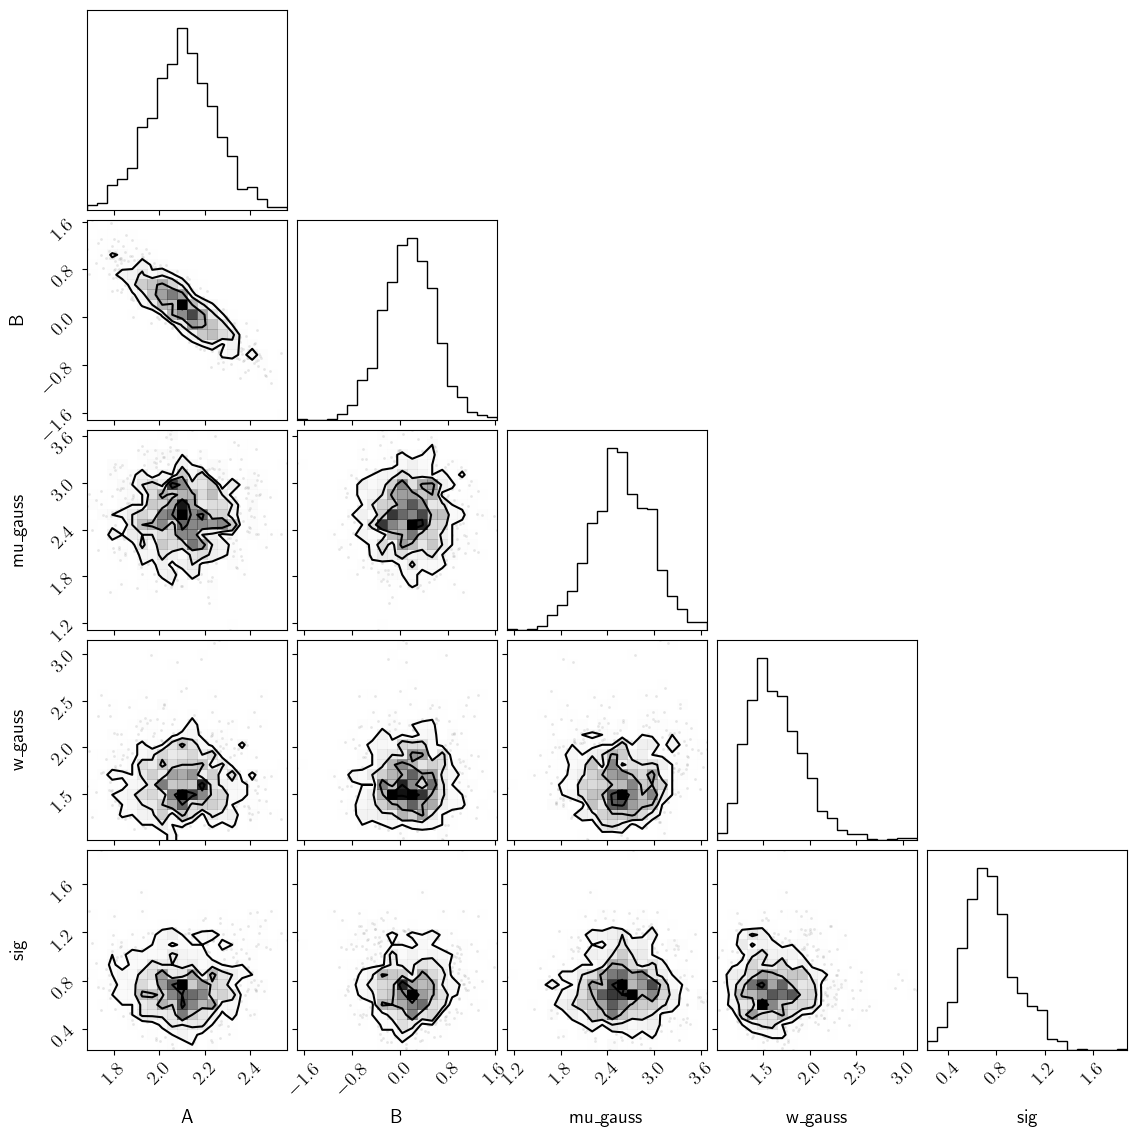

Estimated line using mean: y = 2.1013x + 0.1552
Estimated scatter (sigma) using mean: 0.7513
Estimated line using median: y = 2.1010x + 0.1601
Estimated scatter (sigma) using median: 0.7289


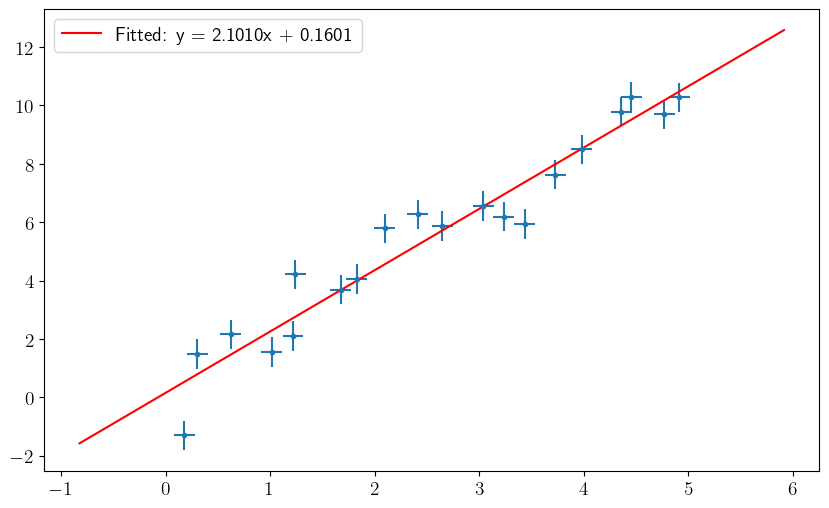

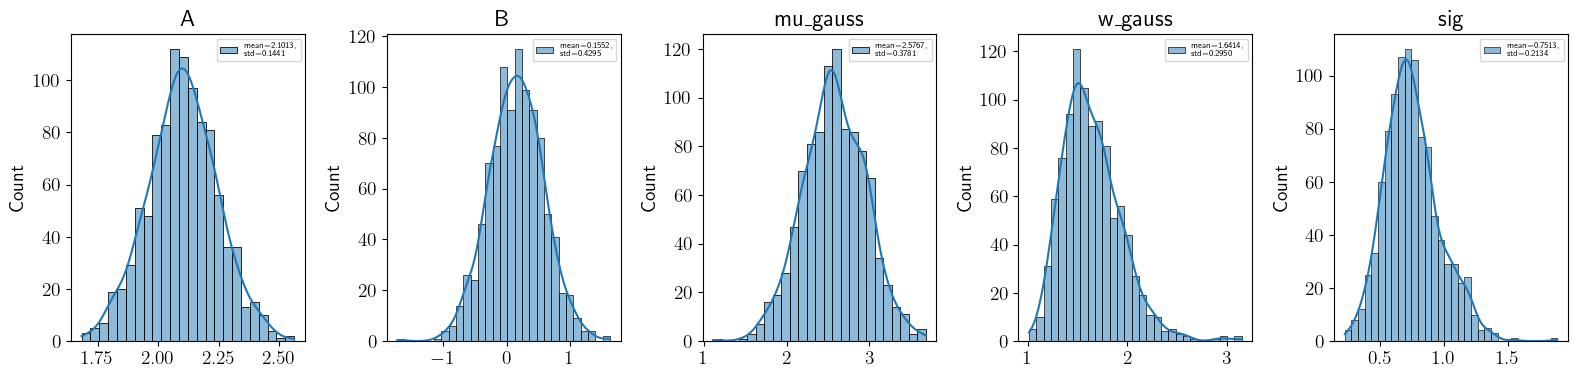

In [ ]:
# Gives basically the same results as above
results = run_linear_regression_without_uplims(xobs, yobs, xerr, yerr, verbose=True)

# ROXY Package with Example from 1_1

In [9]:
## Get the data
xdet, ydet, xdet_err, ydet_err, xuplim, yuplim, xuplim_err, yuplim_err, true_vals = gen_synthetic_data(seed=0, nx=100, verbose=False, no_uplims=True)

In [ ]:
# Gives the same results as in notebook 1_1
nwarm, nsamp = 700, 5000
samples = reg.mcmc(param_names, xdet, ydet, [xdet_err, ydet_err], nwarm, nsamp, method='mnr')


Optimisation Results:
A:	0.6406833529472351
B:	0.10656947642564774
sig:	0.4038839042186737
mu_gauss:	-0.5739966630935669
w_gauss:	1.40470290184021

Running MCMC


sample: 100%|██████████| 5700/5700 [00:05<00:00, 1094.17it/s, 7 steps of size 6.82e-01. acc. prob=0.91]



                mean       std    median      2.5%     97.5%     n_eff     r_hat
         A      0.64      0.03      0.64      0.58      0.70   5107.43      1.00
         B      0.11      0.05      0.11      0.02      0.20   5912.57      1.00
  mu_gauss     -0.57      0.15     -0.57     -0.86     -0.30   6173.81      1.00
       sig      0.41      0.03      0.41      0.35      0.48   5409.53      1.00
   w_gauss      1.43      0.10      1.42      1.23      1.63   5671.35      1.00

Number of divergences: 0
